In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

In [2]:
discord_data = pd.read_excel("data/members (1).xlsx")

In [3]:
discord_data.sort_values(by='joined', ascending=True, inplace=True)

In [4]:
# Step 1: Convert the 'joined' column to datetime format
discord_data['joined'] = pd.to_datetime(discord_data['joined'])

In [5]:
# Step 2: Extract year and month from 'joined' column
discord_data['year'] = discord_data['joined'].dt.year
discord_data['month'] = discord_data['joined'].dt.month

In [6]:
# Step 3: Group by year and month and count the occurrences
monthly_counts = discord_data.groupby(['year', 'month']).size().reset_index(name='count')

In [7]:
# Convert year-month to datetime for the x-axis labels
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

In [8]:
# Step 4: Create a color map for the 12 months
month_colors = cm.get_cmap('tab20', 12)  # 12 distinct colors for the 12 months

C:\Users\samue\AppData\Local\Temp\ipykernel_116472\3313197995.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  month_colors = cm.get_cmap('tab20', 12)  # 12 distinct colors for the 12 months


In [9]:
# Step 5: Create a bar plot with a unique color for each month
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

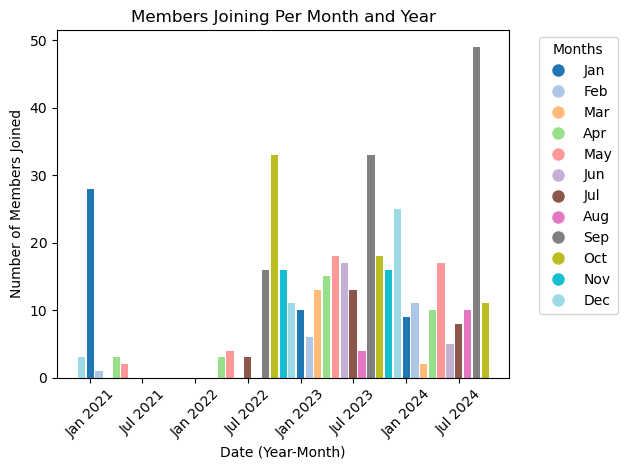

In [10]:
# Assign colors based on the month
bars = plt.bar(
    x=monthly_counts['date'],
    height=monthly_counts['count'],
    color=[month_colors(month - 1) for month in monthly_counts['month']],  # Color based on month
    width=25
)

# Step 6: Add a legend for the months
legend_labels = [mdates.DateFormatter('%b').format_data(mdates.datestr2num(f"2024-{month}-01")) for month in range(1, 13)]
legend_colors = [month_colors(month - 1) for month in range(1, 13)]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_colors[i], markersize=10) for i in range(12)]
plt.legend(legend_patches, legend_labels, title="Months", bbox_to_anchor=(1.05, 1), loc='upper left')


# Step 7: Customize the plot
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Members Joined')
plt.title('Members Joining Per Month and Year')

# Format the x-axis to show month names and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()

# Display the plot
plt.show()